In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Links de 3 universidades de medellín, poli (presencial y virtual), upb y tdea
url_poli_pr = 'https://www.poli.edu.co/profesional/derecho-medellin'
url_poli_vr = 'https://www.poli.edu.co/profesional/derecho-virtual'
url_upb = 'https://www.upb.edu.co/es/pregrados/derecho-medellin'
url_tda = 'https://inscripcionestdea.com/facultad-de-derecho-y-ciencias-forenses/derecho'

In [3]:
def extraction(url):
    """
    Extrae informacion de las pag web
    url: link de la universidad
    retorna: el cuerpo del html
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    body_part = soup.body
    return body_part

In [4]:
def extraction_poli(df, url_poli):
    """
    Extrae informacion de la web del poli tanto para presencial como para virtual
    df: dataframe para poblar, url_poli: link del sitio web (presencial y virtual)
    retorna: las primeras dos filas del dataframe
    """
    institucion = 'Politecnico Grancolombiano'
    try:
        info_poli = extraction(url=url_poli).find(class_='info-curso').find_all('li')
        programa = extraction(url=url_poli).find('h1').text.split()[0]
        duracion = int(info_poli[5].text.split()[1])
        costo = float(info_poli[4].text.split()[-1].replace('.', ''))
        modalidad = extraction(url=url_poli).find_all(class_='modalidades-curso')[0].find('img').text.split()[0]
        if "resolución" in extraction(url=url_poli).find(class_="col-xs-12 infoAdicionalPrograma").text.lower().split():
            acreditacion = "Alta calidad"
    except Exception as e:
        print(f'Error al extraer información de {institucion}')
    
    if url_poli == url_poli_pr:
        df.loc[0, 'institucion'] = institucion
        df.loc[0, 'nombre_programa'] = programa
        df.loc[0, 'duracion_semestre'] = duracion
        df.loc[0, 'costo_cop'] = costo
        df.loc[0, 'modalidad'] = modalidad
        df.loc[0, 'acreditacion'] = acreditacion
        
    else:
        df.loc[1, 'institucion'] = institucion
        df.loc[1, 'nombre_programa'] = programa
        df.loc[1, 'duracion_semestre'] = duracion
        df.loc[1, 'costo_cop'] = costo
        df.loc[1, 'modalidad'] = modalidad
        df.loc[1, 'acreditacion'] = acreditacion

    return df

In [5]:
def extraction_upb(df):
    """
    Extrae informacion de la web de la upb
    df: dataframe para poblar
    retorna: la tercera fila del dataframe
    """
    institucion = 'Universidad Pontificia Bolivariana'
    try:
        programa = extraction(url=url_upb).find('h1').text.strip().replace('\n', '').replace('\t', '').split()[0]
        duracion = int(extraction(url=url_upb).find_all(class_='infoExtra')[0].find_all('div')[1].text.split(':')[1].split()[0])
        costo = float(extraction(url=url_upb).find_all(class_='col-md-6 col-xs-6')[1].text.replace('$', '').replace('.', ''))
        modalidad = extraction(url=url_upb).find_all(class_='UPBtextoIconosCirculares')[-1].text
        if "resolución" in extraction(url=url_upb).find_all(class_='intro')[0].text.split('.')[0].lower().split():
            acreditacion = "Alta calidad"
    except Exception as e:
        print(f'Error al extraer información de {institucion}')
    
    df.loc[2, 'institucion'] = institucion
    df.loc[2, 'nombre_programa'] = programa
    df.loc[2, 'duracion_semestre'] = duracion
    df.loc[2, 'costo_cop'] = costo
    df.loc[2, 'modalidad'] = modalidad
    df.loc[2, 'acreditacion'] = acreditacion
    
    return df

In [6]:
def extraction_tda(df):
    """
    Extrae informacion de la web del tdea
    df: dataframe para poblar
    retorna: la cuarta fila del dataframe
    """
    institucion = 'Tecnologico de Antioquia'
    try:
        programa = extraction(url=url_tda).find('h1').text
        duracion = int(extraction(url=url_tda).find_all('h2')[4].text.split()[0])
        costo =  float(extraction(url=url_tda).find_all('h2')[10].text.split(':')[2].split()[0])*1160000 # 1 SMMLV = 1160000
        modalidad = extraction(url=url_tda).find_all('h2')[6].text
        if "resolución" in extraction(url=url_tda).find_all('h2')[8].text.lower().split():
            acreditacion = "Alta calidad"
    except Exception as e:
        print(f'Error al extraer información de {institucion}')
    
    df.loc[3, 'institucion'] = institucion
    df.loc[3, 'nombre_programa'] = programa
    df.loc[3, 'duracion_semestre'] = duracion
    df.loc[3, 'costo_cop'] = costo
    df.loc[3, 'modalidad'] = modalidad
    df.loc[3, 'acreditacion'] = acreditacion
    
    return df

In [7]:
def transform_data():
    """
    Realiza proceso de extraccion y transformacion de tipos de variable
    retorna: el dataframe final
    """
    df = pd.DataFrame()
    extraction_poli(df, url_poli_pr)
    extraction_poli(df, url_poli_vr)
    extraction_upb(df)
    extraction_tda(df)
    
    df['costo_cop'] = df['costo_cop'].astype(int)
    df['duracion_semestre'] = df['duracion_semestre'].astype(int)
    
    return df
df = transform_data()
df

,institucion,nombre_programa,duracion_semestre,costo_cop,modalidad,acreditacion
0,Politecnico Grancolombiano,Derecho,8,3595000,Presencial,Alta calidad
1,Politecnico Grancolombiano,Derecho,10,2472000,Virtual,Alta calidad
2,Universidad Pontificia Bolivariana,Derecho,10,11293100,Presencial,Alta calidad
3,Tecnologico de Antioquia,Derecho,10,2900000,Presencial,Alta calidad


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   institucion        4 non-null      object
 1   nombre_programa    4 non-null      object
 2   duracion_semestre  4 non-null      int32 
 3   costo_cop          4 non-null      int32 
 4   modalidad          4 non-null      object
 5   acreditacion       4 non-null      object
dtypes: int32(2), object(4)
memory usage: 364.0+ bytes


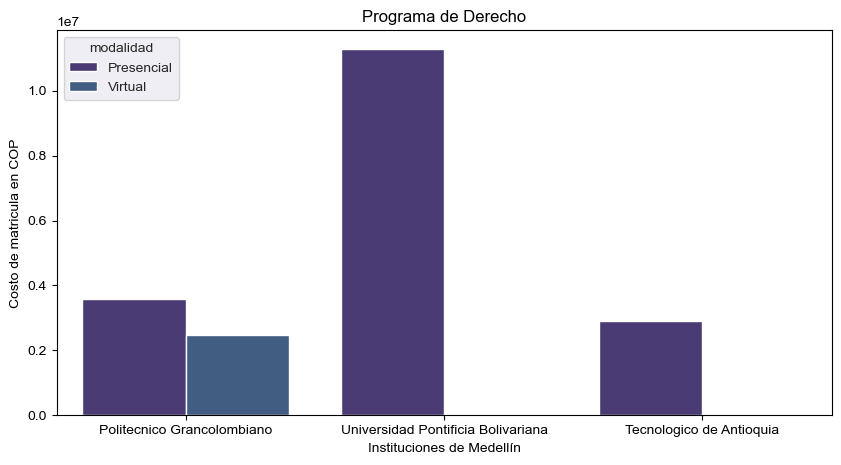

In [9]:
def load_data(df):
    """
    Visualizacion de los datos y carga los datos a un excel
    df: dataframe final
    """
    fig, ax = plt.subplots(figsize=(10, 5))

    sns.set_style('dark')
    sns.set_palette('viridis')
    sns.barplot(data=df, x='institucion', y='costo_cop', hue='modalidad')
    ax.set_xlabel('Instituciones de Medellín')
    ax.set_ylabel('Costo de matricula en COP')
    ax.set_title('Programa de Derecho')
    plt.show()
    
    df.to_excel('universidades_med.xlsx', index=False)

load_data(df)

## Tablero de visualización
[Tableau Dylan](https://public.tableau.com/app/profile/dylan.montoya/viz/Derecho-UniversidadesdeMedellin/Dashboard1)